In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [3]:
df = pd.read_csv('frmgham2.csv')

In [4]:
df

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
1,2448,1,209.0,52,121.0,66.0,0,0.0,NaN,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
2,6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
3,6238,2,260.0,52,105.0,69.5,0,0.0,29.43,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
4,6238,2,237.0,58,108.0,66.0,0,0.0,28.50,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11622,9998212,1,173.0,46,126.0,82.0,0,0.0,19.17,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,0
11623,9998212,1,153.0,52,143.0,89.0,0,0.0,25.74,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,0
11624,9999312,2,196.0,39,133.0,86.0,1,30.0,20.91,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,4201
11625,9999312,2,240.0,46,138.0,79.0,1,20.0,26.39,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,4201


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    11627 non-null  int64  
 1   SEX       11627 non-null  int64  
 2   TOTCHOL   11218 non-null  float64
 3   AGE       11627 non-null  int64  
 4   SYSBP     11627 non-null  float64
 5   DIABP     11627 non-null  float64
 6   CURSMOKE  11627 non-null  int64  
 7   CIGPDAY   11548 non-null  float64
 8   BMI       11575 non-null  float64
 9   DIABETES  11627 non-null  int64  
 10  BPMEDS    11034 non-null  float64
 11  HEARTRTE  11621 non-null  float64
 12  GLUCOSE   10187 non-null  float64
 13  educ      11332 non-null  float64
 14  PREVCHD   11627 non-null  int64  
 15  PREVAP    11627 non-null  int64  
 16  PREVMI    11627 non-null  int64  
 17  PREVSTRK  11627 non-null  int64  
 18  PREVHYP   11627 non-null  int64  
 19  TIME      11627 non-null  int64  
 20  PERIOD    11627 non-null  in

In [9]:
df.columns.unique()

Index(['RANDID', 'SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE',
       'CIGPDAY', 'BMI', 'DIABETES', 'BPMEDS', 'HEARTRTE', 'GLUCOSE', 'educ',
       'PREVCHD', 'PREVAP', 'PREVMI', 'PREVSTRK', 'PREVHYP', 'TIME', 'PERIOD',
       'HDLC', 'LDLC', 'DEATH', 'ANGINA', 'HOSPMI', 'MI_FCHD', 'ANYCHD',
       'STROKE', 'CVD', 'HYPERTEN', 'TIMEAP', 'TIMEMI', 'TIMEMIFC', 'TIMECHD',
       'TIMESTRK', 'TIMECVD', 'TIMEDTH', 'TIMEHYP'],
      dtype='object')

In [7]:
df["ANYCHD"].unique()

array([1, 0], dtype=int64)

In [8]:
df["ANYCHD"].value_counts()

0    8469
1    3158
Name: ANYCHD, dtype: int64

In [10]:
colunas = ['SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE',
       'CIGPDAY', 'BMI', 'DIABETES', 'BPMEDS', 'HEARTRTE', 'GLUCOSE', 'educ','HDLC', 'LDLC', 'ANYCHD','PERIOD']
df2 = df[colunas].copy()

In [11]:
df2

,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,educ,HDLC,LDLC,ANYCHD,PERIOD
0,1,195.0,39,106.0,70.0,0,0.0,26.97,0,0.0,80.0,77.0,4.0,NaN,NaN,1,1
1,1,209.0,52,121.0,66.0,0,0.0,NaN,0,0.0,69.0,92.0,4.0,31.0,178.0,1,3
2,2,250.0,46,121.0,81.0,0,0.0,28.73,0,0.0,95.0,76.0,2.0,NaN,NaN,0,1
3,2,260.0,52,105.0,69.5,0,0.0,29.43,0,0.0,80.0,86.0,2.0,NaN,NaN,0,2
4,2,237.0,58,108.0,66.0,0,0.0,28.50,0,0.0,80.0,71.0,2.0,54.0,141.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11622,1,173.0,46,126.0,82.0,0,0.0,19.17,0,0.0,70.0,NaN,3.0,NaN,NaN,0,2
11623,1,153.0,52,143.0,89.0,0,0.0,25.74,0,0.0,65.0,72.0,3.0,30.0,123.0,0,3
11624,2,196.0,39,133.0,86.0,1,30.0,20.91,0,0.0,85.0,80.0,3.0,NaN,NaN,0,1
11625,2,240.0,46,138.0,79.0,1,20.0,26.39,0,0.0,90.0,83.0,3.0,NaN,NaN,0,2


In [12]:
df2["PERIOD"].value_counts()

1    4434
2    3930
3    3263
Name: PERIOD, dtype: int64

In [13]:
df2 = df2[df2["PERIOD"]==3]

In [14]:
df2

,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,educ,HDLC,LDLC,ANYCHD,PERIOD
1,1,209.0,52,121.0,66.0,0,0.0,NaN,0,0.0,69.0,92.0,4.0,31.0,178.0,1,3
4,2,237.0,58,108.0,66.0,0,0.0,28.50,0,0.0,80.0,71.0,2.0,54.0,141.0,0,3
11,2,NaN,58,155.0,90.0,1,30.0,24.61,0,0.0,74.0,NaN,3.0,NaN,NaN,0,3
14,2,220.0,55,180.0,106.0,0,0.0,31.17,1,1.0,86.0,81.0,2.0,46.0,135.0,1,3
19,2,320.0,57,110.0,46.0,1,30.0,22.02,0,0.0,75.0,87.0,2.0,34.0,286.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11612,1,NaN,63,120.0,80.0,1,50.0,17.38,0,0.0,76.0,NaN,3.0,NaN,NaN,0,3
11615,2,228.0,60,205.0,100.0,1,20.0,22.37,0,0.0,80.0,91.0,2.0,47.0,181.0,0,3
11618,2,251.0,56,145.0,92.0,1,35.0,21.97,0,1.0,95.0,90.0,1.0,70.0,181.0,0,3
11623,1,153.0,52,143.0,89.0,0,0.0,25.74,0,0.0,65.0,72.0,3.0,30.0,123.0,0,3


In [15]:
del df2["PERIOD"]

In [17]:
df2.shape

(3263, 16)

In [18]:
df = df2

In [21]:
df.isnull().sum()

SEX           0
TOTCHOL     214
AGE           0
SYSBP         0
DIABP         0
CURSMOKE      0
CIGPDAY      14
BMI          17
DIABETES      0
BPMEDS      446
HEARTRTE      4
GLUCOSE     562
educ         82
HDLC        236
LDLC        237
ANYCHD        0
dtype: int64

<AxesSubplot:>

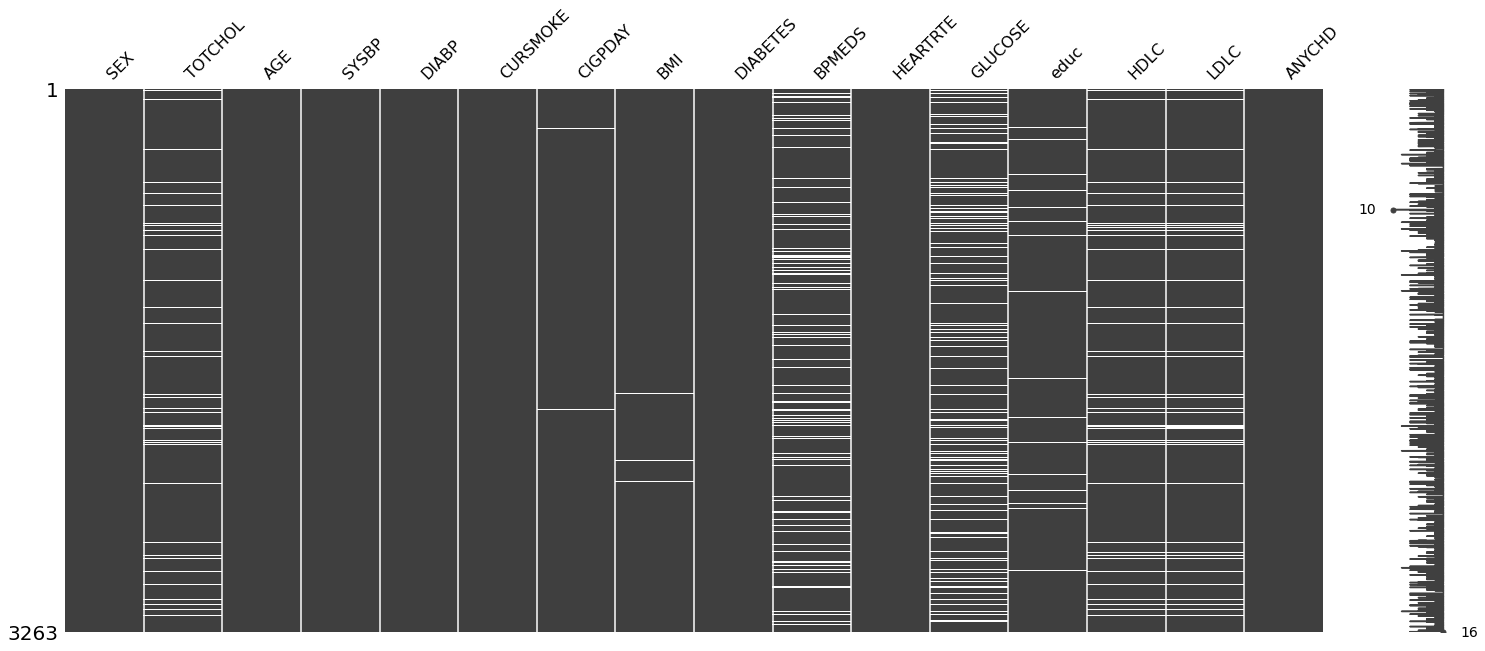

In [25]:
msno.matrix(df)

<AxesSubplot:>

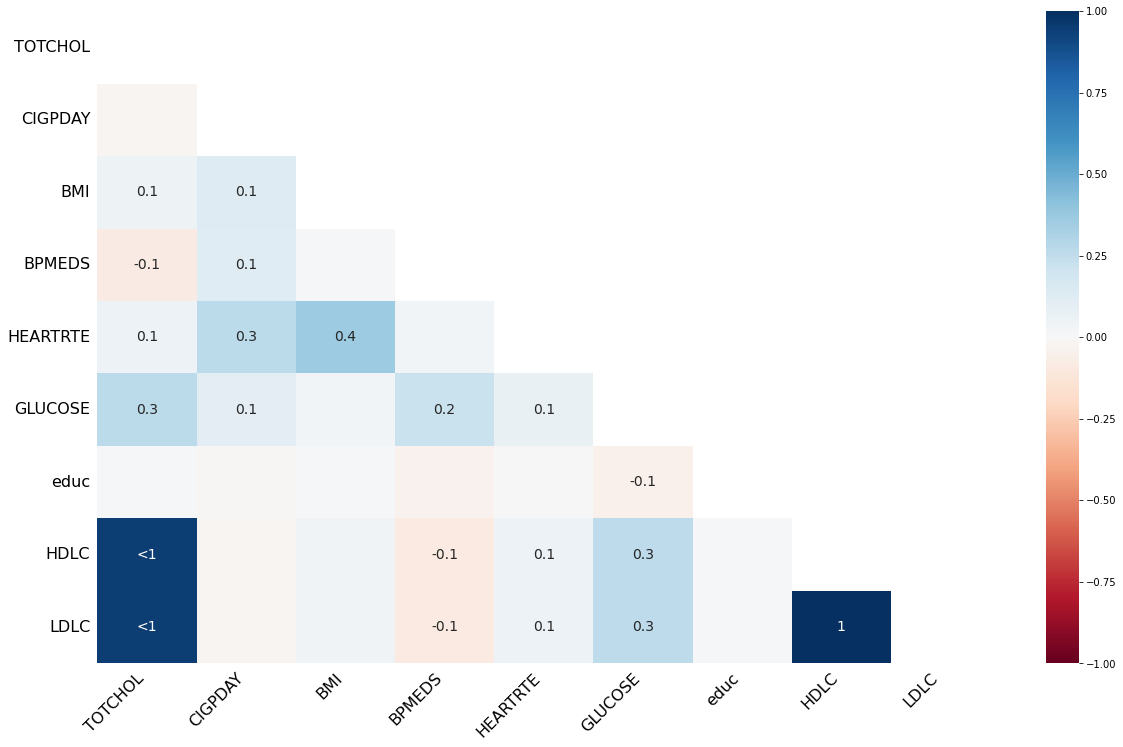

In [26]:
msno.heatmap(df)

In [28]:
features = df.drop(columns=["ANYCHD"])
target = df["ANYCHD"]

features_list = list(features.columns)

In [29]:
features = np.array(features)
target = np.array(target)

In [30]:
from numpy import isnan
from sklearn.impute import KNNImputer

In [33]:
print("Missing", sum(isnan(features).flatten()))

imputer = KNNImputer(missing_values=np.nan)
imputer.fit(features)
features_transf=imputer.transform(features)

print("Missing", sum(isnan(features_transf).flatten()))

Missing 1812
Missing 0
